<a href="https://colab.research.google.com/github/SanguraKoded/Ford-Cars-Price-Prediction/blob/main/Ford_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
upload = files.upload()

Saving ford.csv to ford.csv


In [4]:
df = pd.read_csv('ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
df.shape

(17966, 9)

In [6]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [8]:
for column in df:
    unique_values = df[column].nunique()
    print("Column", column, "has", unique_values, "unique values.")



Column model has 24 unique values.
Column year has 23 unique values.
Column price has 3511 unique values.
Column transmission has 3 unique values.
Column mileage has 13528 unique values.
Column fuelType has 5 unique values.
Column tax has 36 unique values.
Column mpg has 90 unique values.
Column engineSize has 16 unique values.


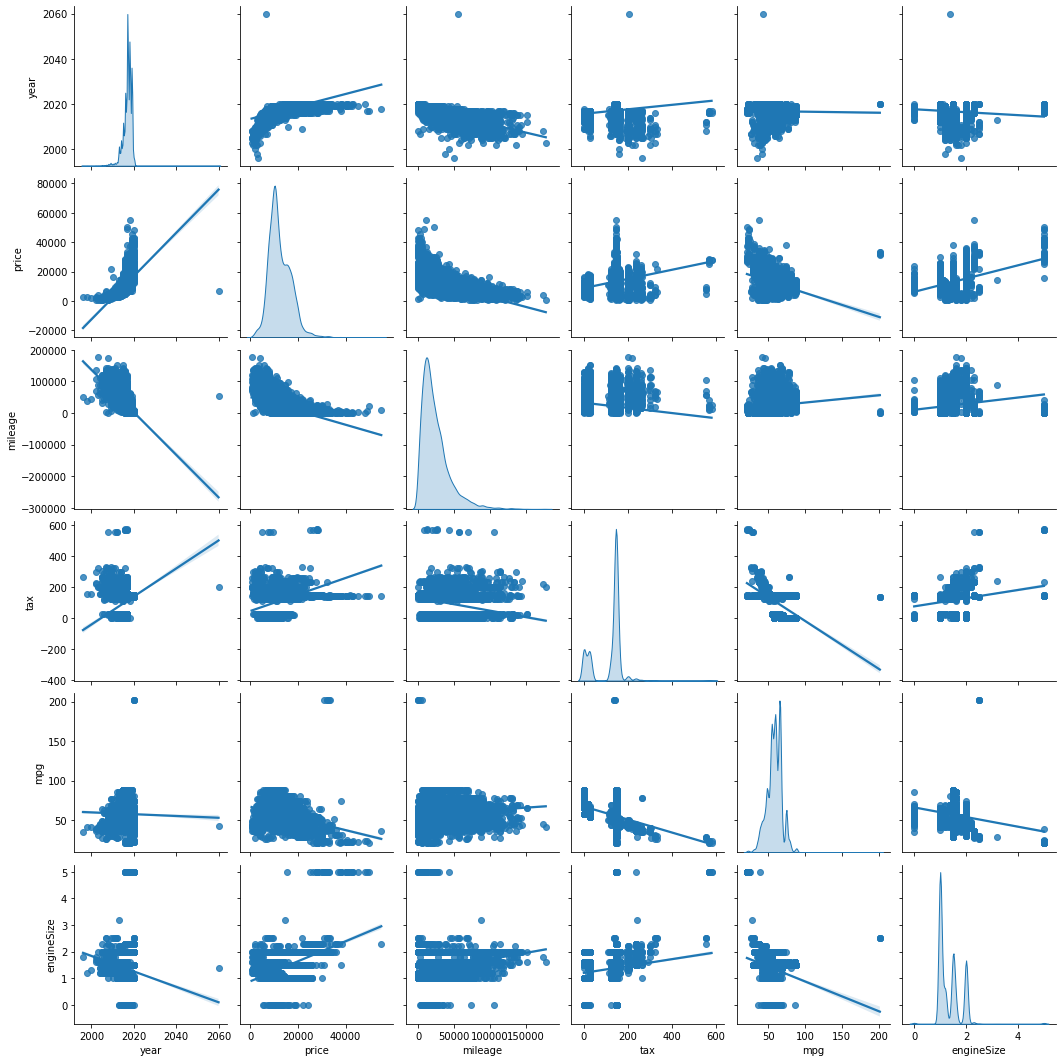

In [9]:
sns.pairplot(data=df, kind = 'reg', diag_kind='kde')

In [10]:
categorical_cols = df[['model','transmission','fuelType']]

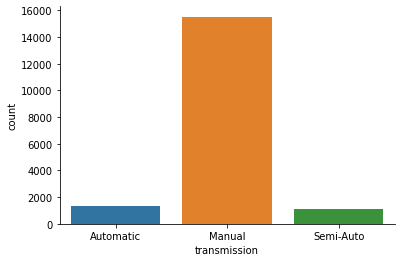

In [11]:
sns.countplot(x="transmission", data=df)
sns.despine()

   

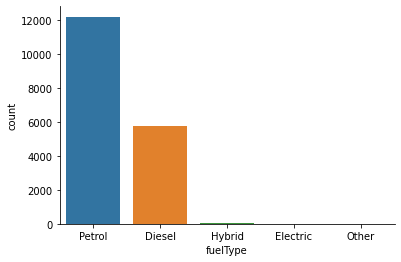

In [12]:
sns.countplot(x="fuelType", data=df)
sns.despine()


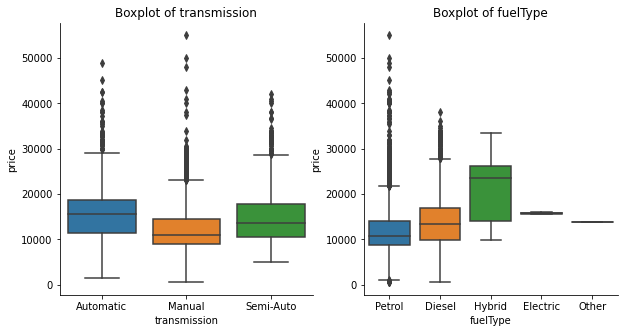

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))


sns.boxplot(x="transmission", y="price", data=df, ax=ax1)
ax1.set_title("Boxplot of transmission")


sns.boxplot(x="fuelType", y="price", data=df, ax=ax2)
ax2.set_title("Boxplot of fuelType")

sns.despine()
plt.show()

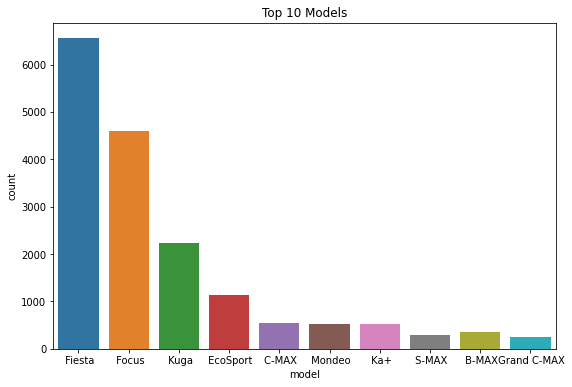

In [14]:
top10_models = df['model'].value_counts().nlargest(10).index.tolist()
df_top10 = df[df['model'].isin(top10_models)]
plt.figure(figsize=(9, 6))
sns.countplot(data=df_top10, x='model')
plt.title('Top 10 Models')
plt.show()

Text(0.5, 1.0, 'Price by Model')

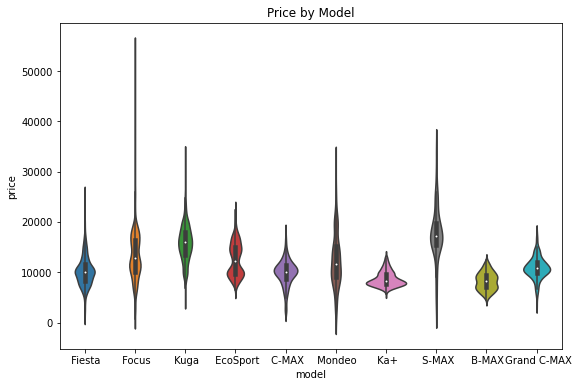

In [15]:
plt.figure(figsize=(9, 6))
sns.violinplot(data=df_top10, x='model', y='price')
plt.title('Price by Model')

Text(0.5, 1.0, 'Price by Model')

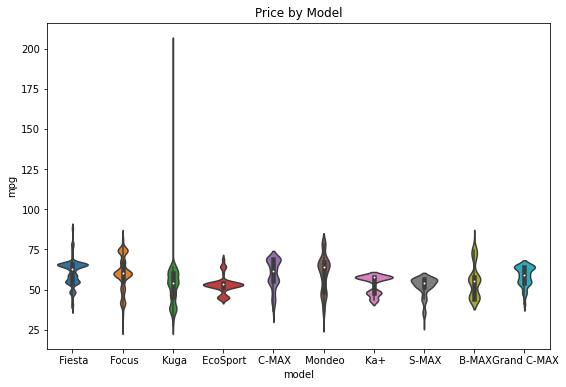

In [16]:
plt.figure(figsize=(9, 6))
sns.violinplot(data=df_top10, x='model', y='mpg')
plt.title('Price by Model')

Text(0.5, 1.0, 'Price by Model')

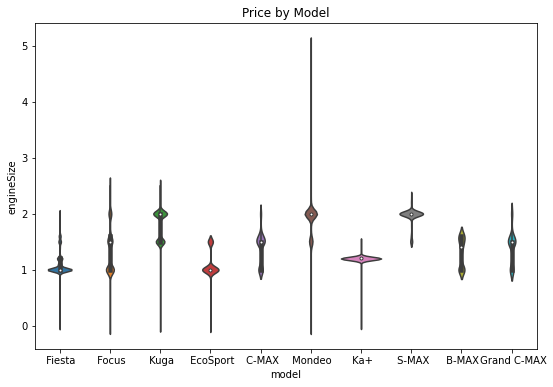

In [17]:
plt.figure(figsize=(9, 6))
sns.violinplot(data=df_top10, x='model', y='engineSize')
plt.title('Price by Model')

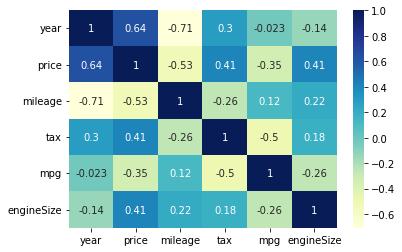

In [18]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [19]:
model_stats = df['model'].value_counts(ascending=False)
model_stats

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

In [20]:
model_stats.values.sum()

17966

In [21]:
len(model_stats[model_stats>10])

19

In [22]:
len(model_stats)

24

In [23]:
len(model_stats[model_stats<=10])

5

In [24]:
model_stats_less_than_10 = model_stats[model_stats<=10]
model_stats_less_than_10

 Streetka           2
 Ranger             1
 Escort             1
 Transit Tourneo    1
Focus               1
Name: model, dtype: int64

In [25]:
df.model = df.model.apply(lambda x: 'other' if x in model_stats_less_than_10 else x)
len(df.model.unique())

20

In [26]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,other,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [27]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [28]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [29]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [30]:
numerical_cols = df.select_dtypes(include=['number'])

In [31]:
numerical_cols.head()

,year,price,mileage,tax,mpg,engineSize
0,2017,12000,15944,150,57.7,1.0
1,2018,14000,9083,150,57.7,1.0
2,2017,13000,12456,150,57.7,1.0
3,2019,17500,10460,145,40.3,1.5
4,2019,16500,1482,145,48.7,1.0


In [32]:
z_scores = (numerical_cols- numerical_cols.mean()) / numerical_cols.std()
threshold = 3
outliers = np.abs(z_scores) > threshold
print(outliers.sum())


year          290
price         171
mileage       328
tax            33
mpg           137
engineSize     97
dtype: int64


In [33]:
df1 = df.copy

In [34]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [35]:
df1 = df.copy()

In [36]:
mean = np.mean(numerical_cols)
std = np.std(numerical_cols)
min_val = mean - 3*std
max_val = mean + 3*std
df1.numerical_cols= numerical_cols[(numerical_cols >= min_val) & (numerical_cols <= max_val)]

<ipython-input-36-07132d30332d>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.numerical_cols= numerical_cols[(numerical_cols >= min_val) & (numerical_cols <= max_val)]


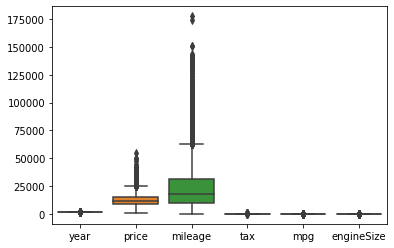

In [37]:
sns.boxplot(data=numerical_cols)

In [38]:
outlier_cols = df1[['price','mileage']]

In [39]:
z_scores = (outlier_cols- outlier_cols.mean()) / outlier_cols.std()
threshold = 3
outliers = np.abs(z_scores) > threshold
print(outliers.sum())

price      171
mileage    328
dtype: int64


In [40]:

mean = np.mean(outlier_cols)
std = np.std(outlier_cols)
min_val = mean - 5*std
max_val = mean + 5*std
outlier_cols= outlier_cols[(outlier_cols>= min_val) & (outlier_cols<= max_val)]

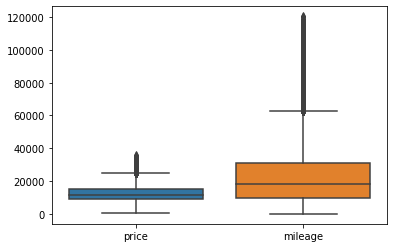

In [41]:
sns.boxplot(data=outlier_cols)

In [42]:
df2= df1.copy()

In [43]:
df2.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [44]:
model_dummies = pd.get_dummies(df2.model)
model_dummies.head(3)

,B-MAX,C-MAX,EcoSport,Edge,Fiesta,Focus,Fusion,Galaxy,Grand C-MAX,Grand Tourneo Connect,KA,Ka+,Kuga,Mondeo,Mustang,Puma,S-MAX,Tourneo Connect,Tourneo Custom,other
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
df2 = pd.concat([df2,model_dummies],axis='columns')
df2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,B-MAX,...,KA,Ka+,Kuga,Mondeo,Mustang,Puma,S-MAX,Tourneo Connect,Tourneo Custom,other
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0,...,0,0,0,0,0,0,0,0,0,0
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
transmission_dummies = pd.get_dummies(df2.transmission)
transmission_dummies.head(3)

,Automatic,Manual,Semi-Auto
0,1,0,0
1,0,1,0
2,0,1,0


In [49]:
df2 = pd.concat([df2,transmission_dummies],axis='columns')
df2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,B-MAX,...,Mondeo,Mustang,Puma,S-MAX,Tourneo Connect,Tourneo Custom,other,Automatic,Manual,Semi-Auto
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,0,...,0,0,0,0,0,0,0,1,0,0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0,...,0,0,0,0,0,0,0,0,1,0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0,...,0,0,0,0,0,0,0,0,1,0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0,...,0,0,0,0,0,0,0,0,1,0
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
fuelType_dummies = pd.get_dummies(df2.fuelType)
fuelType_dummies.head(3)

,Diesel,Electric,Hybrid,Other,Petrol
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1


In [50]:
df2 = pd.concat([df2,fuelType_dummies],axis='columns')
df2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,B-MAX,...,Tourneo Custom,other,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,0,...,0,0,1,0,0,0,0,0,0,1
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0,...,0,0,0,1,0,0,0,0,0,1
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0,...,0,0,0,1,0,0,0,0,0,1
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0,...,0,0,0,1,0,0,0,0,0,1
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0,...,0,0,1,0,0,0,0,0,0,1


In [53]:
df3 = df2.drop(['model','transmission','fuelType'],axis = 'columns')
df3.head()

,year,price,mileage,tax,mpg,engineSize,B-MAX,C-MAX,EcoSport,Edge,...,Tourneo Custom,other,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,2017,12000,15944,150,57.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,16500,1482,145,48.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [54]:
df3.shape

(17966, 34)

In [55]:
X = df3.drop(['price'],axis='columns')
X.head(3)

,year,mileage,tax,mpg,engineSize,B-MAX,C-MAX,EcoSport,Edge,Fiesta,...,Tourneo Custom,other,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,2017,15944,150,57.7,1.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,2018,9083,150,57.7,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,12456,150,57.7,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [56]:
y = df3.price
y.head()

0    12000
1    14000
2    13000
3    17500
4    16500
Name: price, dtype: int64

In [57]:
len(y)

17966

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8588491412063347

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)



array([0.84259402, 0.82016671, 0.8546683 , 0.8579945 , 0.84231877])

In [61]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.843548,{'normalize': False}
1,lasso,0.843332,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.894943,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [62]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.899163589191601

In [64]:
df.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0


In [68]:
def predict_price(model,year,transmission,mileage,fuelType,tax,mpg,engineSize):    
    loc_index = np.where(X.columns==model)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = year
    x[1] = transmission
    x[2] = mileage
    x[3] = fuelType
    x[4] = tax
    x[5] = mpg
    x[6] = engineSize
    if loc_index >= 0:
        x[loc_index] = 1

    return clf.predict([x])[0]

In [67]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object